In [1]:
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 33.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 17.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

In [2]:
TRAIN_PATH = "/train/"
CHECKPOINT_PATH =  "/checkpoint/"
FOLDER_PATH = "/folder/"
LOGS_PATH = "/logs/"
RESULTS_PATH = "/results/"

In [3]:
import torch
import numpy as np
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import json
import pandas as pd
import os
from datasets import load_dataset
from datasets import Dataset, ClassLabel

import torch.nn.functional as F
from torch import nn
from transformers import AutoModel, BertModel

from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn.functional import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from transformers import TrainerCallback, EarlyStoppingCallback

In [6]:
df_train = pd.read_csv('balanced_train.csv')
dataset =  Dataset.from_pandas(df_train)
dataset = dataset.cast_column('category', ClassLabel(names=['normal', 'satire', 'click-bait']))
hf_dataset_splits = dataset.train_test_split(test_size=0.3)
train_dataset = hf_dataset_splits['train']
df_test = pd.read_csv('balanced_test.csv')
dataset =  Dataset.from_pandas(df_train)
test_dataset = dataset.cast_column('category', ClassLabel(names=['normal', 'satire', 'click-bait']))
validation_dataset =  hf_dataset_splits['test']

Casting the dataset:   0%|          | 0/9837 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/9837 [00:00<?, ? examples/s]

# New section

In [7]:
model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
tokenizer = BertTokenizerFast.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
model.config

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/397k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/500M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dumitrescustefan/bert-base-romanian-cased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "dumitrescustefan/bert-base-romanian-cased-v1",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 50000
}

In [8]:
def preprocess_dataset(dataset, tokenizer):
    def tokenize_and_merge_title_content(examples):
        texts = [f"{examples['title']} {examples['content']}"]
        tokenized = tokenizer.batch_encode_plus(
            texts,
            max_length=512,
            padding="max_length",
            truncation=True,
            return_token_type_ids=False,
        )
        return {
            "input_ids": tokenized["input_ids"][0],
            "attention_mask": tokenized["attention_mask"][0],
            "labels": examples["category"]
        }

    dataset = dataset.map(tokenize_and_merge_title_content, batched=False)
    dataset.set_format(
        type='torch',
        columns=['input_ids', 'attention_mask', 'labels']
    )
    return dataset

In [9]:
print(train_dataset.shape)
tokenized_train_dataset = preprocess_dataset(train_dataset, tokenizer)
tokenized_validation_dataset = preprocess_dataset(validation_dataset, tokenizer)

(6885, 3)


Map:   0%|          | 0/6885 [00:00<?, ? examples/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

In [ ]:
class BestModelCheckpointCallback(TrainerCallback):
    def __init__(self, trainer, early_stopping_patience, output_dir):
        self.early_stopping_patience = early_stopping_patience
        self.best_val_acc = None
        self.patience_counter = 0
        self.output_dir = output_dir
        self.trainer = trainer

    def on_log(self, args, state, control, logs=None, **kwargs):
        val_acc = logs.get("eval_accuracy")
        if val_acc is None:
            return

        if self.best_val_acc is None or self.best_val_acc > val_acc:
            self.best_val_acc = val_acc
            self.patience_counter = 0
            self.save_best_model_checkpoint()
        else:
            self.patience_counter += 1
            if self.patience_counter >= self.early_stopping_patience:
                control.should_training_stop = True

    def save_best_model_checkpoint(self):
        if self.output_dir is not None:
            self.trainer.save_model(self.output_dir)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir=RESULTS_PATH,
    num_train_epochs=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir=LOGS_PATH,
    learning_rate=2e-5,
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validation_dataset,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=2)
checkpoint_path = CHECKPOINT_PATH

best_model_checkpoint_callback = BestModelCheckpointCallback(early_stopping_patience = 2,
                                                             output_dir = checkpoint_path,
                                                             trainer = trainer)

trainer.add_callback(early_stopping_callback)
trainer.add_callback(best_model_checkpoint_callback)

trainer.train()

TrainOutput(global_step=3444, training_loss=0.36034557240626813, metrics={'train_runtime': 1686.5367, 'train_samples_per_second': 8.165, 'train_steps_per_second': 2.042, 'total_flos': 3623071762114560.0, 'train_loss': 0.36034557240626813, 'epoch': 2.0})

In [ ]:
trainer_path = FOLDER_PATH + "trainer"
trainer.save_model(trainer_path)

In [ ]:
trainer = BertForSequenceClassification.from_pretrained(trainer_path)

In [ ]:
def evaluate_custom_classifier(model, dataset, device):
    model.eval()

    correct_predictions = 0
    dataloader = DataLoader(dataset, batch_size=4)
    progress_bar = tqdm(dataloader, desc="Evaluate")

    with torch.no_grad():
        for batch in progress_bar:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()

    accuracy = correct_predictions / len(dataset)
    return accuracy

In [ ]:
def train_custom_classifier(model, train_dataset, val_dataset, optimizer, device, num_epochs):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        epoch_loss = 0
        correct_predictions = 0

        train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
        progress_bar = tqdm(train_dataloader, desc="Train")

        for batch in progress_bar:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = torch.nn.functional.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()

        epoch_loss /= len(train_dataset)
        accuracy = correct_predictions / len(train_dataset)

        print(f"Train Loss: {epoch_loss:.5f}, Train Accuracy: {accuracy:.5f}")
        val_accuracy = evaluate_custom_classifier(model, val_dataset, device)
        print(f"Validation Accuracy: {val_accuracy:.5f}")


In [ ]:
class CustomClassifier(nn.Module):
    def __init__(self, pretrained_model, num_classes):
        super(CustomClassifier, self).__init__()
        self.base_model = pretrained_model
        self.dropout = nn.Dropout(0.2)
        self.dense = nn.Linear(self.base_model.config.hidden_size, 128)
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state
        x = hidden_state[:, 0, :]
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.relu(x)
        x = self.classifier(x)
        return x

    def predict(self, input_ids, attention_mask):
        outputs = self.forward(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)
        return predictions

In [ ]:
custom_classifier = CustomClassifier(trainer.base_model, 3)

optimizer = torch.optim.AdamW(custom_classifier.parameters(), lr=2e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_custom_classifier(custom_classifier, tokenized_train_dataset, tokenized_validation_dataset, optimizer, device, num_epochs=3)

Epoch 1/3


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [12:04<00:00,  2.38it/s]


Train Loss: 0.06720, Train Accuracy: 0.89935


Evaluate: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 738/738 [01:31<00:00,  8.04it/s]


Validation Accuracy: 0.89634
Epoch 2/3


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [11:45<00:00,  2.44it/s]


Train Loss: 0.05131, Train Accuracy: 0.92346


Evaluate: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 738/738 [01:30<00:00,  8.11it/s]


Validation Accuracy: 0.90041
Epoch 3/3


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [11:44<00:00,  2.45it/s]


Train Loss: 0.03213, Train Accuracy: 0.95527


Evaluate: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 738/738 [01:30<00:00,  8.12it/s]

Validation Accuracy: 0.86992


In [ ]:
custom_classifier_path = FOLDER_PATH + "custom_classifier.pth"
torch.save(custom_classifier.state_dict(), custom_classifier_path)

In [ ]:
classifier_model = CustomClassifier(trainer.base_model, 3)
classifier_model.load_state_dict(torch.load(custom_classifier_path, map_location=torch.device('cpu')))
classifier_model.to(device)


<ipython-input-72-8327476aca64>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier_model.load_state_dict(torch.load(custom_classifier_path, map_location=torch.devic

CustomClassifier(
  (base_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
tokenized_test_dataset = preprocess_dataset(test_dataset, tokenizer)
test_accuracy = evaluate_custom_classifier(custom_classifier, tokenized_test_dataset, device)

Map:   0%|          | 0/9837 [00:00<?, ? examples/s]

Evaluate: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2460/2460 [05:03<00:00,  8.10it/s]


In [ ]:
def predict_labels(model, dataset, device):
    model.eval()
    dataloader = DataLoader(dataset, batch_size=8)
    predictions = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            outputs = model.predict(input_ids=input_ids, attention_mask=attention_mask)
            predictions.extend(outputs.cpu().numpy())

    return predictions

In [ ]:
predictions = predict_labels(custom_classifier, tokenized_test_dataset, device)
true_labels = tokenized_test_dataset["category"]

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3279
           1       0.86      0.97      0.91      3279
           2       1.00      1.00      1.00      3279

    accuracy                           0.94      9837
   macro avg       0.94      0.94      0.94      9837
weighted avg       0.94      0.94      0.94      9837



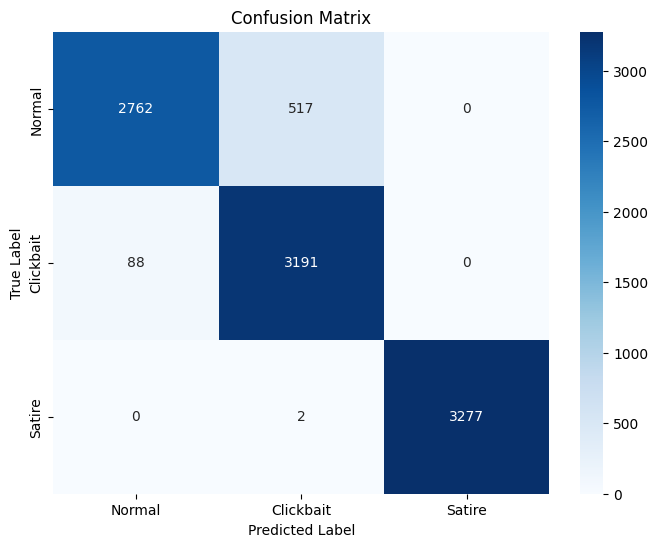

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions))

cm = confusion_matrix(true_labels, predictions)
cm_df = pd.DataFrame(cm, index=['Normal', 'Clickbait', 'Satire'], columns=['Normal', 'Clickbait', 'Satire'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

In [ ]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def forward(self, output1, output2, target):

        distances = 1.0 - cosine_similarity(output1, output2) # dissimilarity
        # distances: 0 - identical
        # distances: 1 - dissimilar

        # target == 1, just distance - to penalize the dissimilar pairs
        # target = 0, relu(margin - distance) - if the pair is dissimilar, but the distance is < margin, it contributes to the loss,
                                                # otherwise, the result is 0 so it doesnt contribute
        loss = 0.5 * (target.float() * distances +
                      (1.0 - target).float() * torch.relu(self.margin - distances).float())
        return loss.mean()

In [16]:
class SiameseNetworkWithBiLSTM(nn.Module):
    def __init__(self, lstm_hidden_size=128, num_classes=3):
        bert_model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
        super(SiameseNetworkWithBiLSTM, self).__init__()
        self.text_encoder = BertModel.from_pretrained(bert_model_name)
        self.bilstm = nn.LSTM(
            input_size=768,
            hidden_size=lstm_hidden_size,
            batch_first=True,
            bidirectional=True
        )
        self.fc_bilstm = nn.Linear(lstm_hidden_size * 2, num_classes)

        self.fc_combined = nn.Linear(4, num_classes)

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2):
        output1 = self.text_encoder(input_ids=input_ids1, attention_mask=attention_mask1)
        embeddings1 = self.mean_pooling(output1.last_hidden_state, attention_mask1)

        output2 = self.text_encoder(input_ids=input_ids2, attention_mask=attention_mask2)
        embeddings2 = self.mean_pooling(output2.last_hidden_state, attention_mask2)

        similarity_score = 1.0 - cosine_similarity(embeddings1, embeddings2).unsqueeze(1)

        bilstm_output, _ = self.bilstm(output2.last_hidden_state)
        bilstm_logits = self.fc_bilstm(bilstm_output[:, -1, :])
        combined_score = torch.cat((similarity_score, bilstm_logits), dim=1)
        final_logits = self.fc_combined(combined_score)

        return similarity_score, bilstm_logits, final_logits

    def mean_pooling(self, token_embeddings, attention_mask):
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        return sum_embeddings / sum_mask


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 5
batch_size = 4

model = SiameseNetworkWithBiLSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

In [18]:
criterion_classification = nn.CrossEntropyLoss()  # Task-specific classification loss

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    progress_bar = tqdm(train_dataloader, desc="Train")
    correct_predictions = 0

    for batch in progress_bar:
        title, content, target = batch['title'], batch['content'], batch['category']  # target: 0, 1, 2

        inputs_title = tokenizer(title, padding=True, truncation=True, max_length=256, return_tensors='pt').to(device)
        inputs_content = tokenizer(content, padding=True, truncation=True, max_length=256, return_tensors='pt').to(device)

        optimizer.zero_grad()

        similarity_score, lstm_logits, final_logits = model(
            input_ids1=inputs_title['input_ids'],
            attention_mask1=inputs_title['attention_mask'],
            input_ids2=inputs_content['input_ids'],
            attention_mask2=inputs_content['attention_mask']
        )

        # Loss 2: Classification Loss
        loss = criterion_classification(final_logits, target.to(device))  # Use ground truth category

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(final_logits, dim=1).to(device)
        target = target.to(device)
        correct_predictions += (preds == target).sum().item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_dataloader)}")
    accuracy = correct_predictions / len(train_dataset)
    print(f"Train Accuracy: {accuracy:.5f}")



Train:   1%|          | 9/1722 [00:02<07:24,  3.86it/s]

model.safetensors:   0%|          | 0.00/500M [00:00<?, ?B/s]

Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [07:34<00:00,  3.79it/s]


Epoch 1/5, Loss: 0.8010115652895694
Train Accuracy: 0.64125


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [07:32<00:00,  3.80it/s]


Epoch 2/5, Loss: 0.5880293241343986
Train Accuracy: 0.73813


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [07:32<00:00,  3.81it/s]


Epoch 3/5, Loss: 0.5062249595522188
Train Accuracy: 0.79463


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [07:33<00:00,  3.79it/s]


Epoch 4/5, Loss: 0.448779262533102
Train Accuracy: 0.83268


Train: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1722/1722 [07:32<00:00,  3.80it/s]

Epoch 5/5, Loss: 0.40749546555795735
Train Accuracy: 0.84430


In [ ]:
siamese_classifier_path = FOLDER_PATH + "siamese_classifier.pth"
torch.save(model.state_dict(), siamese_classifier_path)

RuntimeError: Parent directory /folder does not exist.

In [ ]:
custom_data = [
    {"title": "»òtire bombƒÉ: Descoperire majorƒÉ √Æn domeniul AI", "content": "CercetƒÉtorii anun»õƒÉ un nou model de inteligen»õƒÉ artificialƒÉ.", "expected": "real"},
    {"title": "10 metode rapide de a te √ÆmbogƒÉ»õi!", "content": "AflƒÉ cum sƒÉ faci bani rapid »ôi u»ôor.", "expected": "clickbait"},
    {"title": "Liderii mondiali declarƒÉ cƒÉ luna este fƒÉcutƒÉ din br√¢nzƒÉ", "content": "O abordare satiricƒÉ a evenimentelor recente.", "expected": "satire"},
]


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


category_mapping = {"satire": 2, "clickbait": 1, "real": 0}
def evaluate_model(model, dataset, tokenizer, category_mapping, device):
    """
    Evaluate the model on a given dataset and print relevant metrics.

    Args:
    - model: The trained model to evaluate.
    - dataset: The dataset (train or validation) to evaluate on.
    - tokenizer: The tokenizer used for text preprocessing.
    - category_mapping: Mapping of category labels to class names.
    - device: The device to perform computation on (CUDA or CPU).
    """
    model.eval()  # Set the model to evaluation mode
    predictions = []
    true_labels = []

    correct_predictions = 0
    total_predictions = 0

    # Iterate through the dataset
    for item in dataset:
        title, content, expected = item["title"], item["content"], item["category"]

        # Tokenize title and content
        inputs_title = tokenizer(title, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)
        inputs_content = tokenizer(content, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)

        # Forward pass through the model
        with torch.no_grad():
            similarity_score, lstm_logits, final_logits = model(
                input_ids1=inputs_title['input_ids'],
                attention_mask1=inputs_title['attention_mask'],
                input_ids2=inputs_content['input_ids'],
                attention_mask2=inputs_content['attention_mask']
            )

            # Get predicted category
            pred_label = torch.argmax(final_logits, dim=1).item()
            # Store result for later evaluation
            predictions.append(pred_label)
            true_labels.append(expected)

            # Count correct predictions
            if pred_label == expected:
                correct_predictions += 1
            total_predictions += 1

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')


    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    print("\nClassification Report:")
    print(classification_report(true_labels, predictions))

    cm = confusion_matrix(true_labels, predictions)
    cm_df = pd.DataFrame(cm, index=['Normal', 'Clickbait', 'Satire'], columns=['Normal', 'Clickbait', 'Satire'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



Accuracy: 0.83
Precision: 0.86
Recall: 0.83
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      2279
           1       0.90      0.55      0.68      2284
           2       1.00      1.00      1.00      2322

    accuracy                           0.83      6885
   macro avg       0.86      0.83      0.82      6885
weighted avg       0.86      0.83      0.82      6885



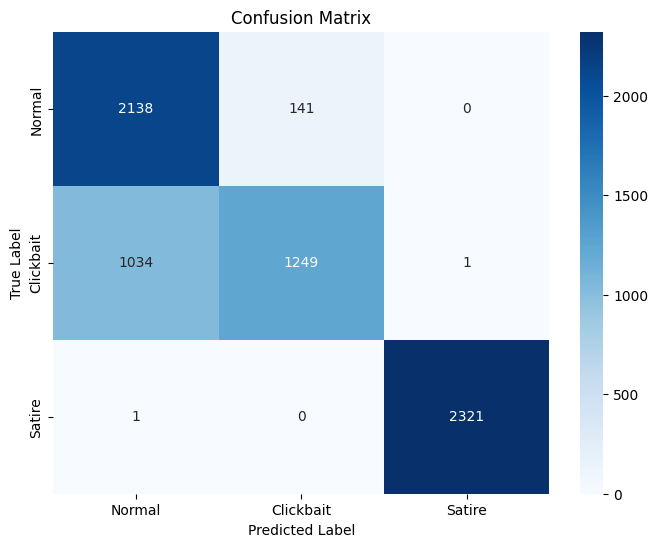

In [20]:

# Usage Example for Train and Validation Datasets
# For training data
evaluate_model(model, train_dataset, tokenizer, category_mapping, device)


Accuracy: 0.79
Precision: 0.83
Recall: 0.79
F1-Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      1000
           1       0.85      0.46      0.60       995
           2       1.00      1.00      1.00       957

    accuracy                           0.79      2952
   macro avg       0.83      0.79      0.78      2952
weighted avg       0.83      0.79      0.78      2952



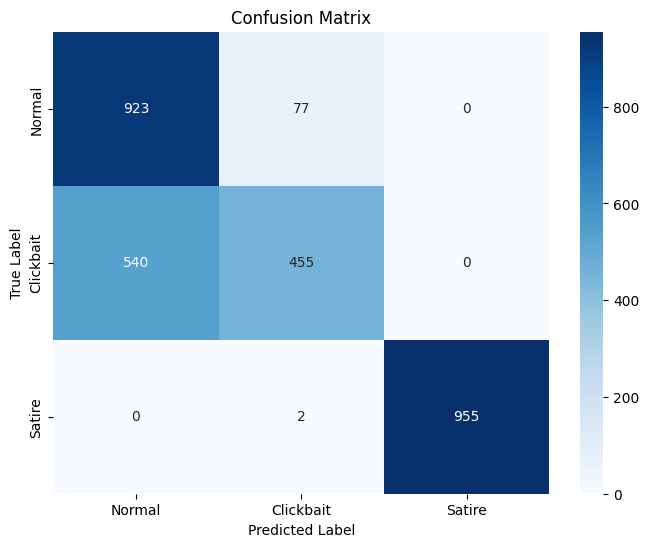

In [21]:

# For validation data
evaluate_model(model, validation_dataset, tokenizer, category_mapping, device)